In [44]:
import json
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# --- US company list

response = requests.get('https://financialmodelingprep.com/api/v3/stock/list?apikey=f33b3631d5140a4f1c87e7f2eafd8fdd')
response.encoding = 'utf-8'
raw_list=response.json()
comp_list = [i['symbol'] for i in raw_list]
exchange = set([i['exchange'] for i in raw_list])
exchange_us = ['NASDAQ',
 'NASDAQ Global Market',
 'NYSE',
 'NYSE American',
 'Nasdaq',
 'Nasdaq Capital Market',
 'Nasdaq Global Market',
 'Nasdaq Global Select',
 'New York Stock Exchange',
 'New York Stock Exchange Arca']
us_list = [i['symbol'] for i in raw_list if i['exchange'] in exchange_us]

In [6]:
def file(n):
    with open(f'data/{n}.txt', encoding = 'utf-8') as f:
        data = json.load(f)
        f.close()
    return data

info = ['asset', 'income', 'profile', 'cashflow']
for i in info:
    exec(f'{i} = file(i)')

In [7]:
asset[1][0]

{'date': '2021-03-31',
 'symbol': 'CMCSA',
 'reportedCurrency': 'USD',
 'fillingDate': '2021-04-29',
 'acceptedDate': '2021-04-29 15:22:23',
 'period': 'Q1',
 'cashAndCashEquivalents': 14950000000,
 'shortTermInvestments': 0.0,
 'cashAndShortTermInvestments': 14950000000,
 'netReceivables': 10986000000,
 'inventory': 0.0,
 'otherCurrentAssets': 3502000000,
 'totalCurrentAssets': 29438000000,
 'propertyPlantEquipmentNet': 52317000000,
 'goodwill': 70106000000,
 'intangibleAssets': 107209000000,
 'goodwillAndIntangibleAssets': 177315000000,
 'longTermInvestments': 487000000,
 'taxAssets': 0.0,
 'otherNonCurrentAssets': 11065000000,
 'totalNonCurrentAssets': 249073000000,
 'otherAssets': 0.0,
 'totalAssets': 278511000000,
 'accountPayables': 11148000000,
 'shortTermDebt': 4777000000,
 'taxPayables': 0.0,
 'deferredRevenue': 3376000000,
 'otherCurrentLiabilities': 0.0,
 'totalCurrentLiabilities': 30811000000,
 'longTermDebt': 98936000000,
 'deferredRevenueNonCurrent': 0.0,
 'deferredTaxLia

In [8]:
def dataframe(n):

    temp = []
    for i in n:
        if i != 0:
            for j in i:
                temp.append(j)
    return pd.DataFrame(temp)

asset_df = dataframe(asset)
income_df = dataframe(income)
profile_df = dataframe(profile)
cashflow_df = dataframe(cashflow)        

In [13]:
def year(n):
    n['year'] = n['date'].str.slice(0,4)
    n['code'] = n['year'] + '-' + n['period'] + '-' + n['symbol']

for i in [asset_df, income_df, cashflow_df]:
    year(i)

In [14]:
asset_df.head()

,date,symbol,reportedCurrency,fillingDate,acceptedDate,period,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,...,othertotalStockholdersEquity,totalStockholdersEquity,totalLiabilitiesAndStockholdersEquity,totalInvestments,totalDebt,netDebt,link,finalLink,year,code
0,2021-03-31,CMCSA,USD,2021-04-29,2021-04-29 15:22:23,Q1,14950000000,0,14950000000,1.098600e+10,...,0.0,9.257500e+10,2.769860e+11,0,103713000000,88763000000,https://www.sec.gov/Archives/edgar/data/116669...,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,2021,2021-Q1-CMCSA
1,2020-12-31,CMCSA,USD,2021-02-04,2021-02-03 18:08:14,Q4,11740000000,0,11740000000,1.146600e+10,...,0.0,9.173800e+10,2.738690e+11,0,103760000000,92020000000,https://www.sec.gov/Archives/edgar/data/116669...,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,2020,2020-Q4-CMCSA
2,2020-09-30,CMCSA,USD,2020-10-29,2020-10-29 15:03:25,Q1,13707000000,0,13707000000,1.031000e+10,...,0.0,8.757100e+10,2.689400e+11,0,104424000000,90717000000,https://www.sec.gov/Archives/edgar/data/116669...,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,2020,2020-Q1-CMCSA
3,2020-06-30,CMCSA,USD,2020-07-30 00:00:00,2020-07-30 18:31:48,Q2,13935000000,0,13935000000,1.022700e+10,...,0.0,8.479100e+10,2.659780e+11,0,104810000000,90875000000,https://www.sec.gov/Archives/edgar/data/116669...,https://www.sec.gov/Archives/edgar/data/116669...,2020,2020-Q2-CMCSA
4,2020-03-31,CMCSA,USD,2020-04-30 00:00:00,2020-04-30 15:24:15,Q1,8516000000,0,8516000000,1.080000e+10,...,0.0,8.278300e+10,2.624210e+11,0,103577000000,95061000000,https://www.sec.gov/Archives/edgar/data/116669...,https://www.sec.gov/Archives/edgar/data/116669...,2020,2020-Q1-CMCSA


In [17]:
income_df.head()

,date,symbol,reportedCurrency,fillingDate,acceptedDate,period,revenue,costOfRevenue,grossProfit,grossProfitRatio,...,netIncome,netIncomeRatio,eps,epsdiluted,weightedAverageShsOut,weightedAverageShsOutDil,link,finalLink,year,code
0,2021-03-31,CMCSA,USD,2021-04-29,2021-04-29,Q1,2.720500e+10,8.919000e+09,1.828600e+10,0.672156,...,3.329000e+09,0.122367,0.730000,0.710000,4.591000e+09,4.665000e+09,https://www.sec.gov/Archives/edgar/data/116669...,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,2021,2021-Q1-CMCSA
1,2020-12-31,CMCSA,USD,2021-02-04,2021-02-04,Q4,2.770800e+10,9.438000e+09,1.827000e+10,0.659376,...,3.380000e+09,0.121986,0.737886,0.730000,4.580656e+09,4.645000e+09,https://www.sec.gov/Archives/edgar/data/116669...,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,2020,2020-Q4-CMCSA
2,2020-09-30,CMCSA,USD,2020-10-29,2020-10-29,Q3,2.553200e+10,8.565000e+09,1.696700e+10,0.664539,...,2.019000e+09,0.079077,0.441119,0.436258,4.577000e+09,4.628000e+09,https://www.sec.gov/Archives/edgar/data/116669...,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,2020,2020-Q3-CMCSA
3,2020-06-30,CMCSA,USD,2020-07-30 00:00:00,2020-07-30 18:31:48,Q2,2.371500e+10,6.817000e+09,1.689800e+10,0.712545,...,2.988000e+09,0.125996,0.648580,0.648580,4.607000e+09,4.607000e+09,https://www.sec.gov/Archives/edgar/data/116669...,https://www.sec.gov/Archives/edgar/data/116669...,2020,2020-Q2-CMCSA
4,2020-03-31,CMCSA,USD,2020-04-30 00:00:00,2020-04-30 15:24:15,Q1,2.660900e+10,8.301000e+09,1.830800e+10,0.688038,...,2.147000e+09,0.080687,0.465020,0.465020,4.617000e+09,4.617000e+09,https://www.sec.gov/Archives/edgar/data/116669...,https://www.sec.gov/Archives/edgar/data/116669...,2020,2020-Q1-CMCSA


In [18]:
cashflow_df.head()

,date,symbol,reportedCurrency,fillingDate,acceptedDate,period,netIncome,depreciationAndAmortization,deferredIncomeTax,stockBasedCompensation,...,netChangeInCash,cashAtEndOfPeriod,cashAtBeginningOfPeriod,operatingCashFlow,capitalExpenditure,freeCashFlow,link,finalLink,year,code
0,2021-03-31,CMCSA,USD,2021-04-29,2021-04-29 15:22:23,Q1,3.329000e+09,3.362000e+09,28000000.0,373000000.0,...,3.208000e+09,1.497600e+10,1.176800e+10,7.751000e+09,-2.471000e+09,5.280000e+09,https://www.sec.gov/Archives/edgar/data/116669...,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,2021,2021-Q1-CMCSA
1,2020-12-31,CMCSA,USD,2021-02-04,2021-02-03 18:08:14,Q4,3.380000e+09,3.252000e+09,-326000000.0,271000000.0,...,-1.969000e+09,1.176800e+10,1.373700e+10,5.042000e+09,-3.519000e+09,1.523000e+09,https://www.sec.gov/Archives/edgar/data/116669...,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,2020,2020-Q4-CMCSA
2,2020-09-30,CMCSA,USD,2020-10-29,2020-10-29 15:03:25,Q1,2.019000e+09,3.320000e+09,-140000000.0,301000000.0,...,-2.390000e+08,1.373700e+10,1.397600e+10,5.228000e+09,-2.939000e+09,2.289000e+09,https://www.sec.gov/Archives/edgar/data/116669...,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,2020,2020-Q1-CMCSA
3,2020-06-30,CMCSA,USD,2020-07-30 00:00:00,2020-07-30 18:31:48,Q2,2.988000e+09,3.264000e+09,36000000.0,323000000.0,...,5.367000e+09,1.397600e+10,8.609000e+09,8.643000e+09,-2.677000e+09,5.966000e+09,https://www.sec.gov/Archives/edgar/data/116669...,https://www.sec.gov/Archives/edgar/data/116669...,2020,2020-Q2-CMCSA
4,2020-03-31,CMCSA,USD,2020-04-30 00:00:00,2020-04-30 15:24:15,Q1,2.147000e+09,3.264000e+09,-120000000.0,298000000.0,...,3.020000e+09,8.609000e+09,5.589000e+09,5.824000e+09,-2.499000e+09,3.325000e+09,https://www.sec.gov/Archives/edgar/data/116669...,https://www.sec.gov/Archives/edgar/data/116669...,2020,2020-Q1-CMCSA


In [37]:
combined_df = pd.merge(asset_df, income_df, on='code')
combined_df = pd.merge(combined_df, cashflow_df, on='code')

In [39]:
combined_df.drop(columns=['date_x','symbol_x','reportedCurrency_x','fillingDate_x','acceptedDate_x','period_x','link_x','finalLink_x'], inplace=True)
combined_df.drop(columns=['date_y','symbol_y','reportedCurrency_y','fillingDate_y','acceptedDate_y','period_y','link_y','finalLink_y','year_y','netIncome_y','depreciationAndAmortization_y','inventory_y'], inplace=True)
combined_df.drop(columns=['link','finalLink'], inplace=True)


In [42]:
combined_df.head().to_csv('combined.csv')

In [56]:
correlation = combined_df.corr().apply(lambda x: round(x, 2))
correlation.to_csv('correlation.csv')
correlation

,netReceivables,inventory_x,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,intangibleAssets,goodwillAndIntangibleAssets,longTermInvestments,taxAssets,...,dividendsPaid,otherFinancingActivites,netCashUsedProvidedByFinancingActivities,effectOfForexChangesOnCash,netChangeInCash,cashAtEndOfPeriod,cashAtBeginningOfPeriod,operatingCashFlow,capitalExpenditure,freeCashFlow
netReceivables,1.00,0.75,0.33,0.0,0.62,-0.0,0.32,-0.0,0.07,0.44,...,-0.31,-0.03,-0.00,0.11,0.01,0.22,0.16,0.34,-0.29,0.08
inventory_x,0.75,1.00,0.16,0.0,0.61,-0.0,0.22,-0.0,0.06,0.49,...,-0.28,0.00,-0.00,0.07,0.01,0.14,0.10,0.28,-0.23,0.04
otherCurrentAssets,0.33,0.16,1.00,0.0,0.26,-0.0,0.40,-0.0,0.12,0.14,...,-0.32,0.05,0.00,0.15,0.02,0.12,0.08,0.20,-0.15,0.06
totalCurrentAssets,0.00,0.00,0.00,1.0,0.00,0.0,0.00,0.0,0.00,0.00,...,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00
propertyPlantEquipmentNet,0.62,0.61,0.26,0.0,1.00,-0.0,0.30,-0.0,0.06,0.53,...,-0.35,-0.15,-0.03,0.14,0.01,0.19,0.14,0.43,-0.39,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cashAtEndOfPeriod,0.22,0.14,0.12,0.0,0.19,-0.0,0.08,-0.0,0.02,0.14,...,-0.13,-0.06,0.36,0.08,0.39,1.00,0.54,0.23,-0.06,0.15
cashAtBeginningOfPeriod,0.16,0.10,0.08,0.0,0.14,-0.0,0.06,-0.0,0.02,0.10,...,-0.10,-0.06,-0.02,0.05,-0.19,0.54,1.00,0.11,0.01,0.11
operatingCashFlow,0.34,0.28,0.20,0.0,0.43,-0.0,0.08,-0.0,0.02,0.28,...,-0.28,-0.11,-0.06,0.10,0.18,0.23,0.11,1.00,-0.17,0.63
capitalExpenditure,-0.29,-0.23,-0.15,-0.0,-0.39,0.0,-0.12,0.0,-0.02,-0.19,...,0.17,0.11,-0.61,-0.08,-0.09,-0.06,0.01,-0.17,1.00,0.61


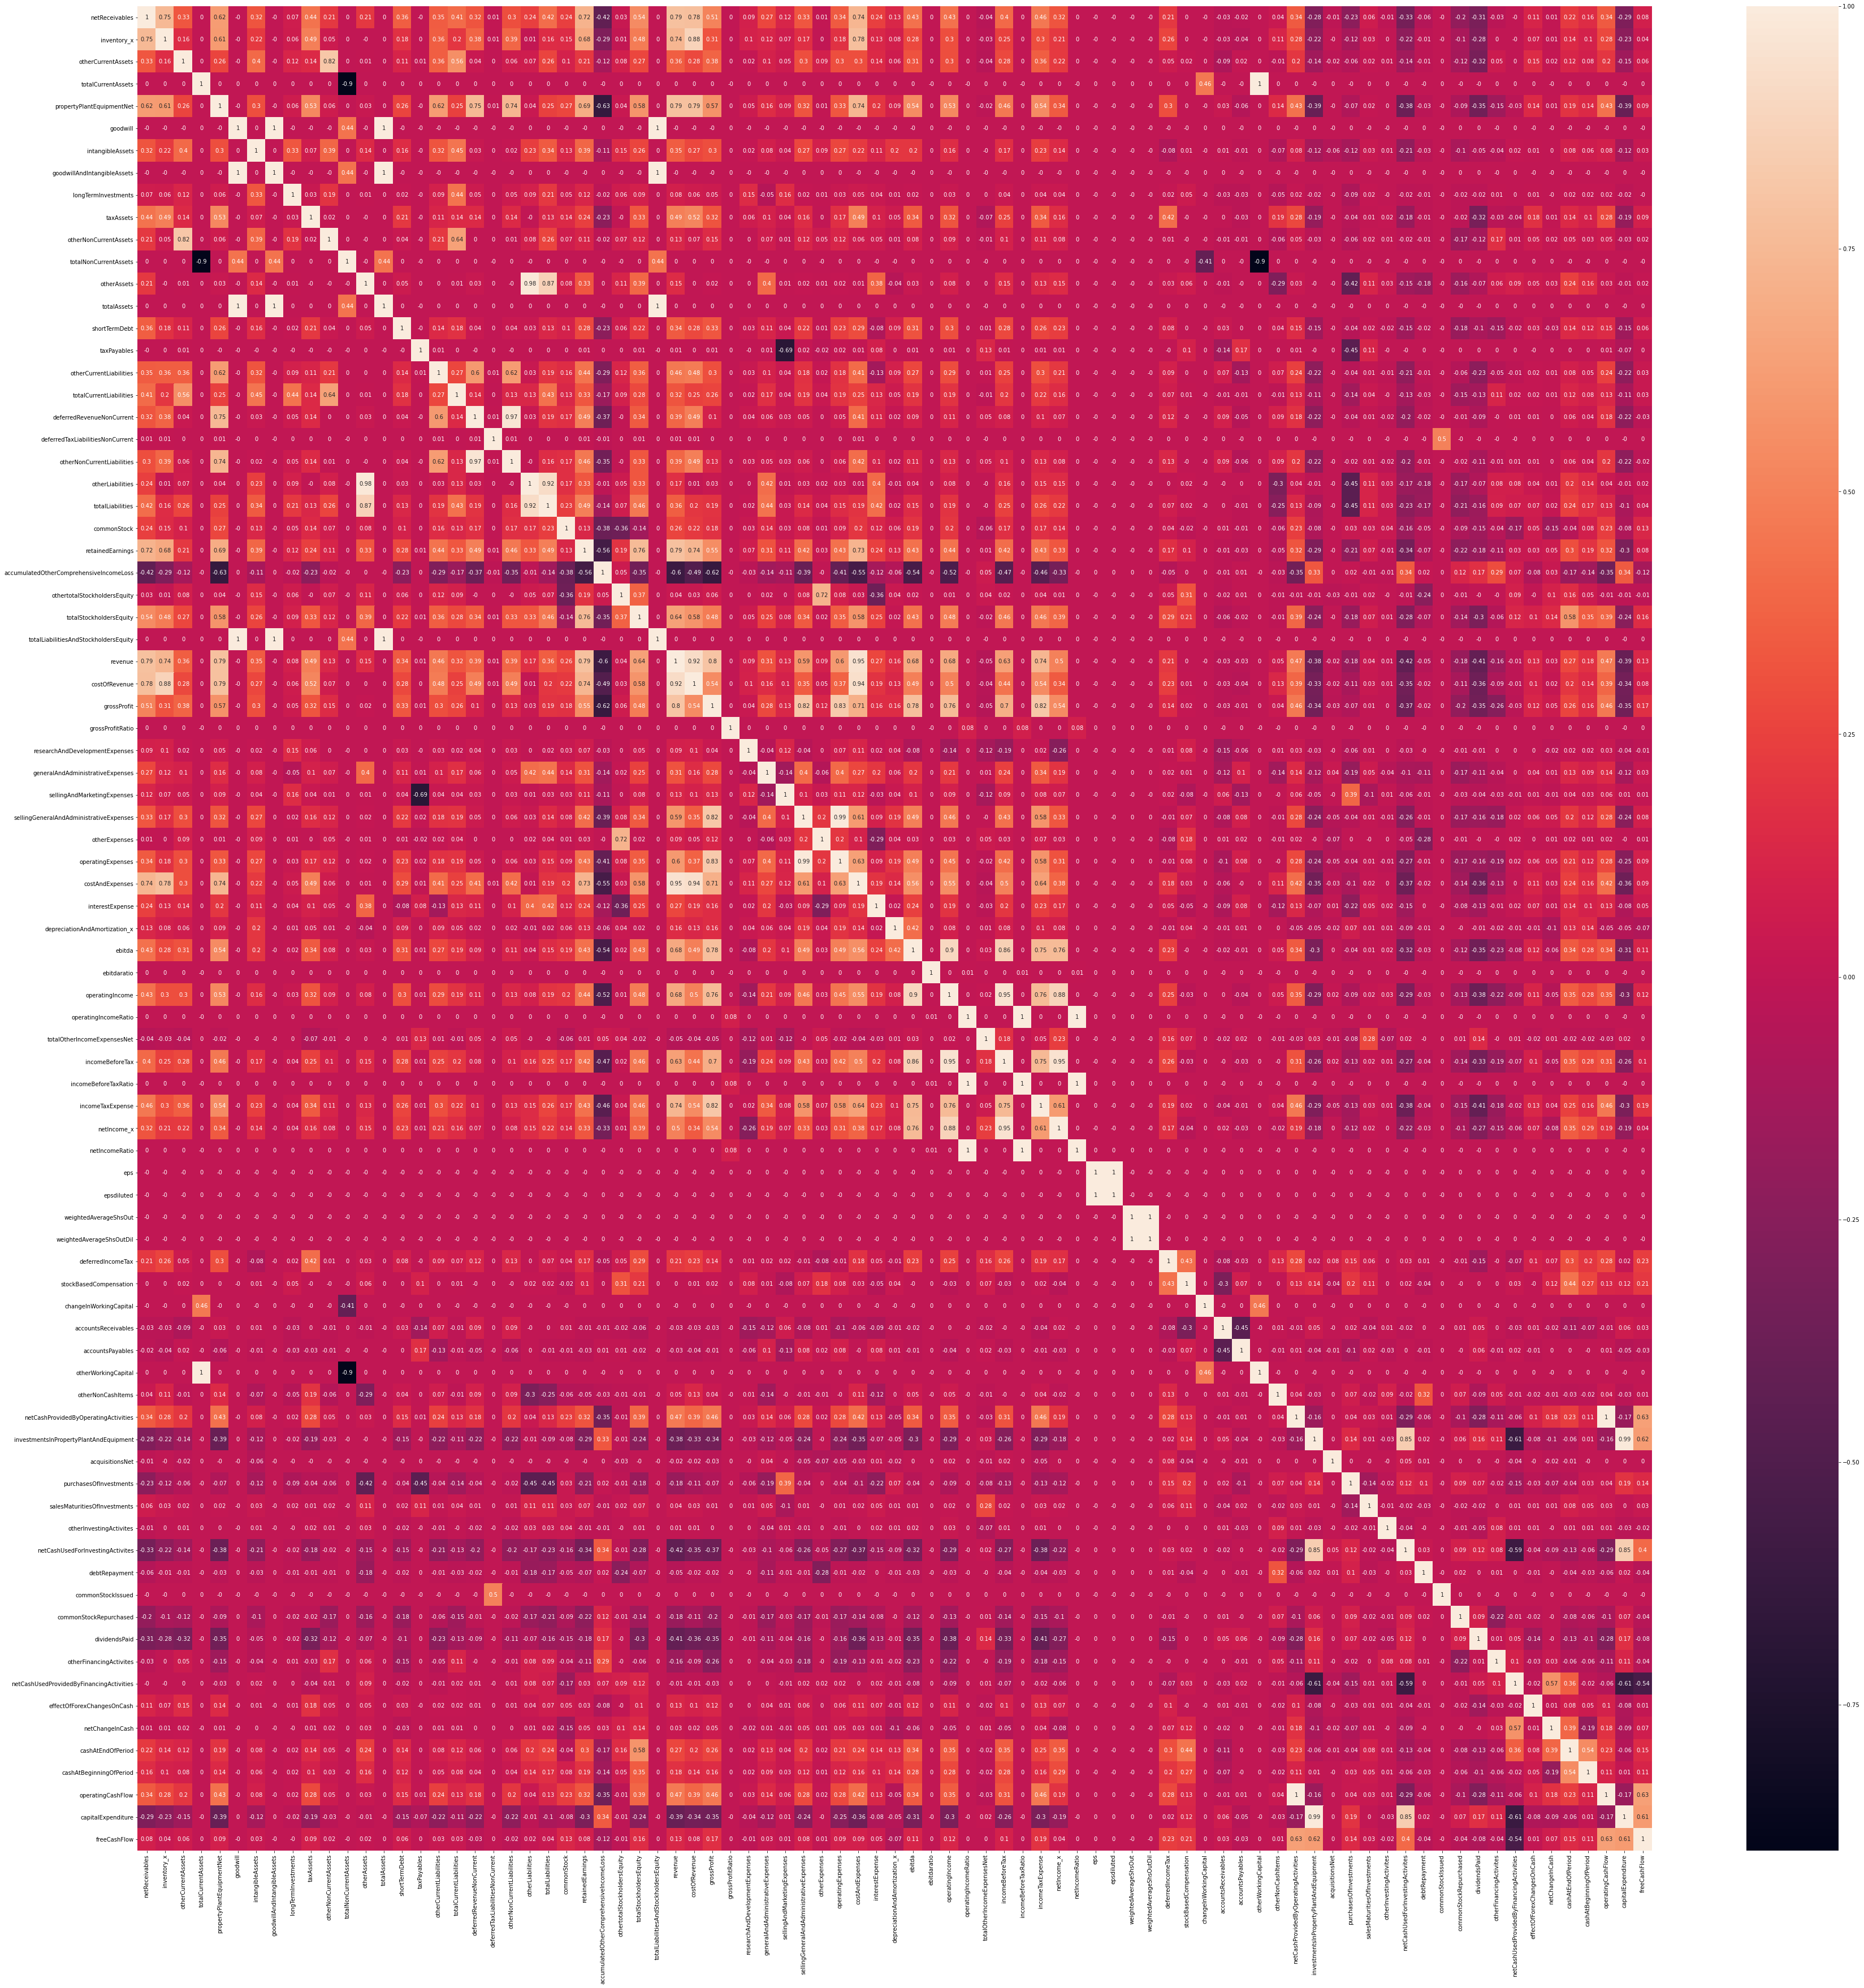

In [57]:
plt.figure(figsize=(60,60))
sns.heatmap(correlation, annot=True)
plt.savefig('correlation.png')